In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

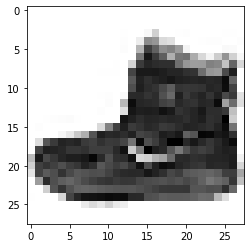

In [7]:
plt.imshow(X_train[0],cmap='Greys')

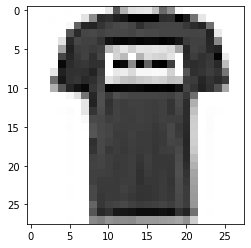

In [8]:
plt.imshow(X_train[1],cmap='Greys')

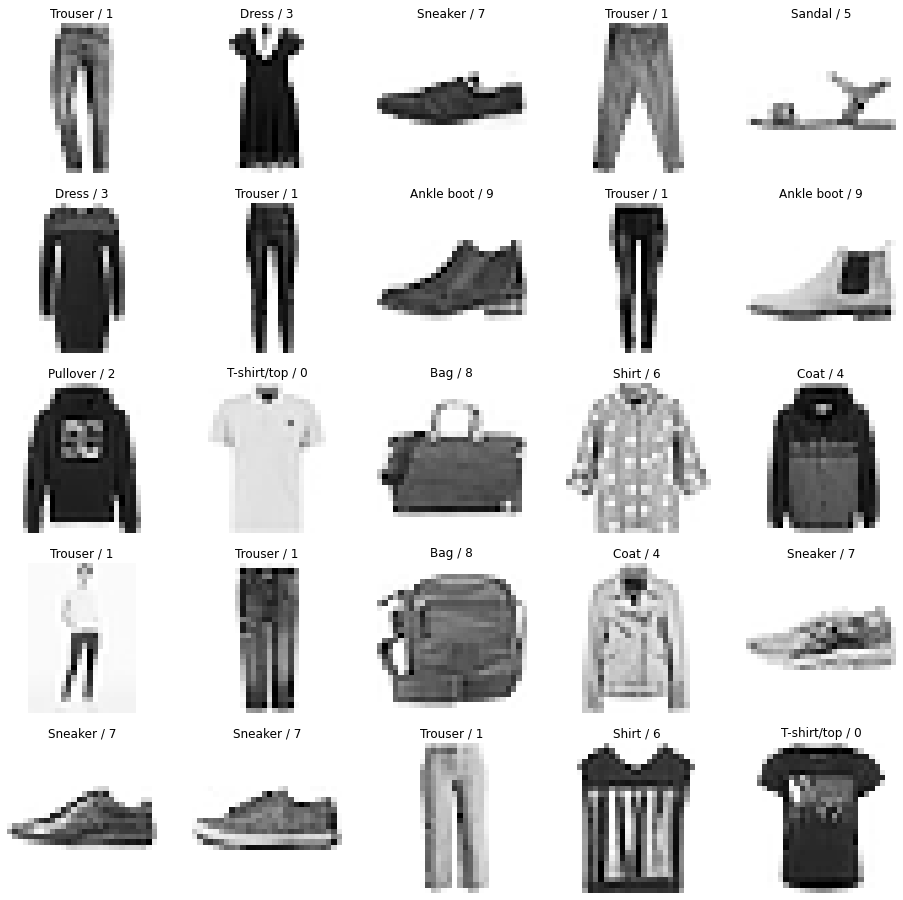

In [9]:
class_labels = ["T-shirt/top","Trouser",	"Pullover","Dress","Coat",	"Sandal",	"Shirt",	"Sneaker",	"Bag",	"Ankle boot"]
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(X_train[i],cmap="Greys")
    plt.axis('off')
    plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train.ndim

3

In [12]:
X_train = np.expand_dims(X_train,-1)

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_train.ndim

4

In [15]:
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [16]:
X_train = X_train/255
X_test= X_test/255

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [18]:
X_train.shape,X_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [19]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 17s 177ms/step - loss: 0.6416 - accuracy: 0.7831 - val_loss: 0.4197 - val_accuracy: 0.8539
Epoch 2/10
94/94 [==============================] - 15s 164ms/step - loss: 0.3756 - accuracy: 0.8687 - val_loss: 0.3656 - val_accuracy: 0.8713
Epoch 3/10
94/94 [==============================] - 15s 164ms/step - loss: 0.3333 - accuracy: 0.8820 - val_loss: 0.3339 - val_accuracy: 0.8846
Epoch 4/10
94/94 [==============================] - 16s 166ms/step - loss: 0.3020 - accuracy: 0.8926 - val_loss: 0.3112 - val_accuracy: 0.8912
Epoch 5/10
94/94 [==============================] - 15s 164ms/step - loss: 0.2769 - accuracy: 0.9009 - val_loss: 0.3110 - val_accuracy: 0.8915
Epoch 6/10
94/94 [==============================] - 15s 163ms/step - loss: 0.2632 - accuracy: 0.9064 - val_loss: 0.2969 - val_accuracy: 0.8942
Epoch 7/10
94/94 [==============================] - 15s 159ms/step - loss: 0.2502 - accuracy: 0.9108 - val_loss: 0.2867 - val_accuracy: 0.8991

In [23]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
y_test[0]

9

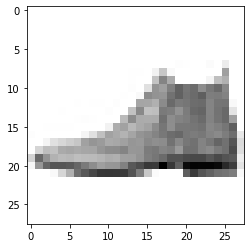

In [25]:
plt.imshow(X_test[0],cmap='Greys')

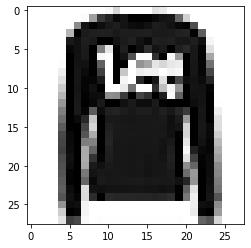

In [26]:
plt.imshow(X_test[1],cmap='Greys')

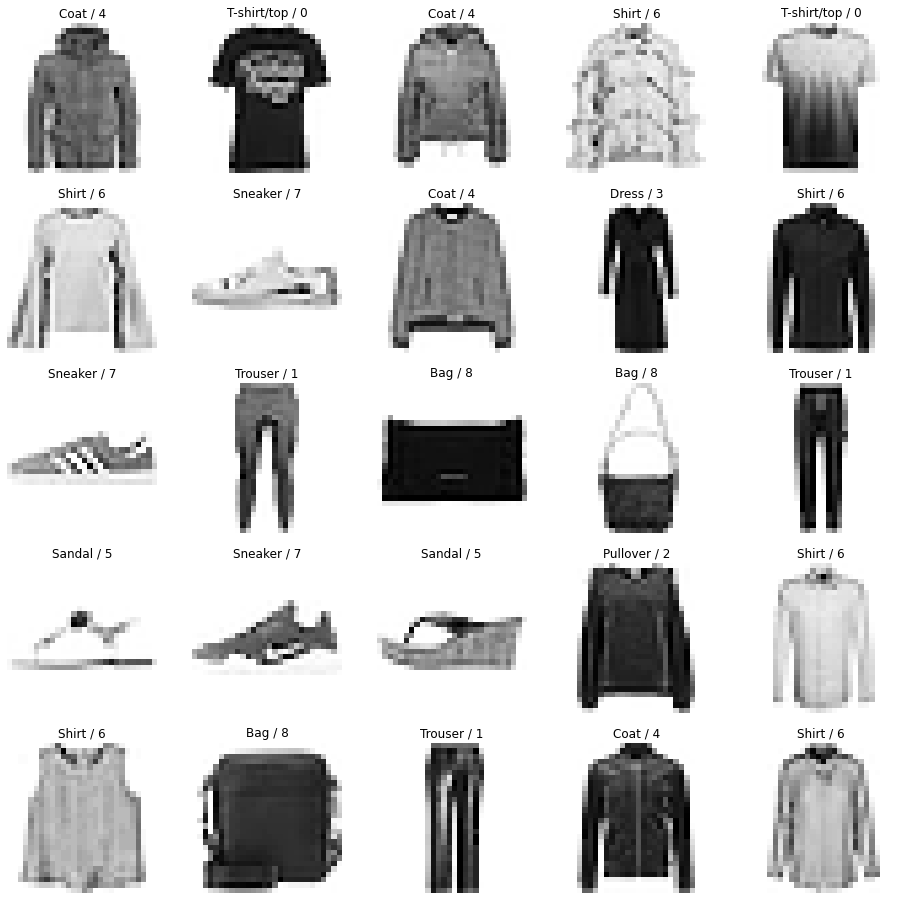

In [28]:
class_labels = ["T-shirt/top","Trouser",	"Pullover","Dress","Coat",	"Sandal",	"Shirt",	"Sneaker",	"Bag",	"Ankle boot"]
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(X_test[i],cmap="Greys")
    plt.axis('off')
    plt.title('{} / {}'.format(class_labels[y_test[i]],y_test[i]))

In [30]:
X_test.shape

(10000, 28, 28)

In [31]:
X_test.ndim

3

In [32]:
X_test = np.expand_dims(X_test,-1)

In [34]:
X_test.shape

(10000, 28, 28, 1)

In [35]:
X_test.ndim

4

In [36]:
X_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [38]:
X_test.shape,X_validation.shape,y_test.shape,y_validation.shape

((10000, 28, 28, 1), (9600, 28, 28, 1), (10000,), (9600,))

In [39]:
test_model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [40]:
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [41]:
test_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
test_model.fit(X_test,y_test,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/10
20/20 [==============================] - 4s 218ms/step - loss: 1.1759 - accuracy: 0.6300 - val_loss: 0.6445 - val_accuracy: 0.7648
Epoch 2/10
20/20 [==============================] - 4s 185ms/step - loss: 0.5974 - accuracy: 0.7823 - val_loss: 0.5199 - val_accuracy: 0.8126
Epoch 3/10
20/20 [==============================] - 4s 199ms/step - loss: 0.5049 - accuracy: 0.8153 - val_loss: 0.4853 - val_accuracy: 0.8280
Epoch 4/10
20/20 [==============================] - 4s 191ms/step - loss: 0.4522 - accuracy: 0.8405 - val_loss: 0.4390 - val_accuracy: 0.8476
Epoch 5/10
20/20 [==============================] - 4s 186ms/step - loss: 0.4149 - accuracy: 0.8560 - val_loss: 0.4186 - val_accuracy: 0.8507
Epoch 6/10
20/20 [==============================] - 4s 190ms/step - loss: 0.3885 - accuracy: 0.8649 - val_loss: 0.3997 - val_accuracy: 0.8610
Epoch 7/10
20/20 [==============================] - 4s 184ms/step - loss: 0.3682 - accuracy: 0.8696 - val_loss: 0.3843 - val_accuracy: 0.8630
Epoch 